### Test des classes de bases

Vous trouverez ici les dernières versions des classes de base du jeu.

In [4]:
%run -i "Loader.ipynb"
%run -i "BaseClasses.ipynb"
%run -i "Strategies.ipynb"

High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Marketcap    float64
dtype: object
df min date: 2017-10-01  max date: 2022-08-17


Ada from  2017-10-01  to  2022-08-17
Btc from  2017-10-01  to  2022-08-17


### Test loader



In [5]:
loader = Loader()

loader.loadSource(Loader.COINCODEX, forceEqualDate=True)

df = loader.get(Loader.COINCODEX, Loader.ADA)

print(df.dtypes)

serie = df.Close
#serie

High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Marketcap    float64
dtype: object


### Test Game simple

In [6]:
# création Account et Strategy
account = Account(100)
strategyLongTerm = StrategyLongTerm(serie.index[0], serie.index[1781])
strategyRandom = StrategyRandom()
strategyOracle = StrategyOracle()
strategyEffetJanvier = StrategyEffetJanvier()
strategyKinjun_Sen = StrategyKinjun_Sen()
strategyDollarSpendOverTime = StrategyDollarSpendOverTime()
strategyCoinFlip = StrategyCoinFlip()
strategyVeille = StrategyVeille()
strategyIntrinsicPrice = StrategyIntrinsicPrice()
strategyInvestmentThreshold = StrategyInvestmentThreshold(12.0)
# création du jeu
game = Game(serie)
game.setAccount(account)
game.setStrategy(strategyKinjun_Sen)
game.run()

### Test Eval



Evaluation d'une série et d'une stratégie en partant de $t_0$  



In [7]:
evalGame = EvalGame(100)

gainKinjun_Sen = evalGame.eval(serie, strategyKinjun_Sen, iteration=10, debug=False)
print(strategyKinjun_Sen.nb_and_cost_Sell)
#gainKinjun_Sen

['nb_Sell:', 1890, 'cost_Sell', 2812641.9640463097]


Evaluation d'une série et d'une stratégie en partant de chaque $t_i$

In [8]:
evalGame = EvalGame(100)
nbiteration = 1

gainOracle = evalGame.evalTime(serie, strategyOracle, iteration=nbiteration, debug=False)

gainEffetJanvier = evalGame.evalTime(serie, strategyEffetJanvier, iteration=nbiteration, debug=False)


# gainOracle.head()

Evaluation d'une stratégie sur plusieurs series :  



In [9]:
ada = loader.get(Loader.COINCODEX, Loader.ADA).Close
eth = loader.get(Loader.COINCODEX, Loader.ETH).Close
btc = loader.get(Loader.COINCODEX, Loader.BTC).Close

evalGame = EvalGame(100)

gain = evalGame.evalSeries([ada, eth, btc], strategyKinjun_Sen, iteration=10, debug=False)


# gain

In [10]:
def graphicseries(gain):
    datas = [ada, eth, btc]
    colors = ["r", "b", "g"]
    names = [ "ada", "eth", "btc"]
    for donnee, couleur, name in zip(range(len(datas)), colors, names) :
        plt.plot(gain[donnee], color=couleur, label=(name))

    plt.title("Gains pour chaque serie")
    plt.xlabel("Nombre d'itérations")
    plt.ylabel("Gain")
    plt.legend()

    plt.show()
# graphicseries

Evaluation de plusieurs stratégies sur une même série :



In [11]:
evalGame = EvalGame(100)

gain = evalGame.evalStrategies(serie, [strategyLongTerm, strategyRandom, strategyOracle, strategyEffetJanvier, strategyKinjun_Sen, strategyVeille, strategyInvestmentThreshold, strategyDollarSpendOverTime, strategyCoinFlip, strategyIntrinsicPrice], iteration=10, debug=False)

strats_serie = gain.head()

In [12]:
#strats_serie

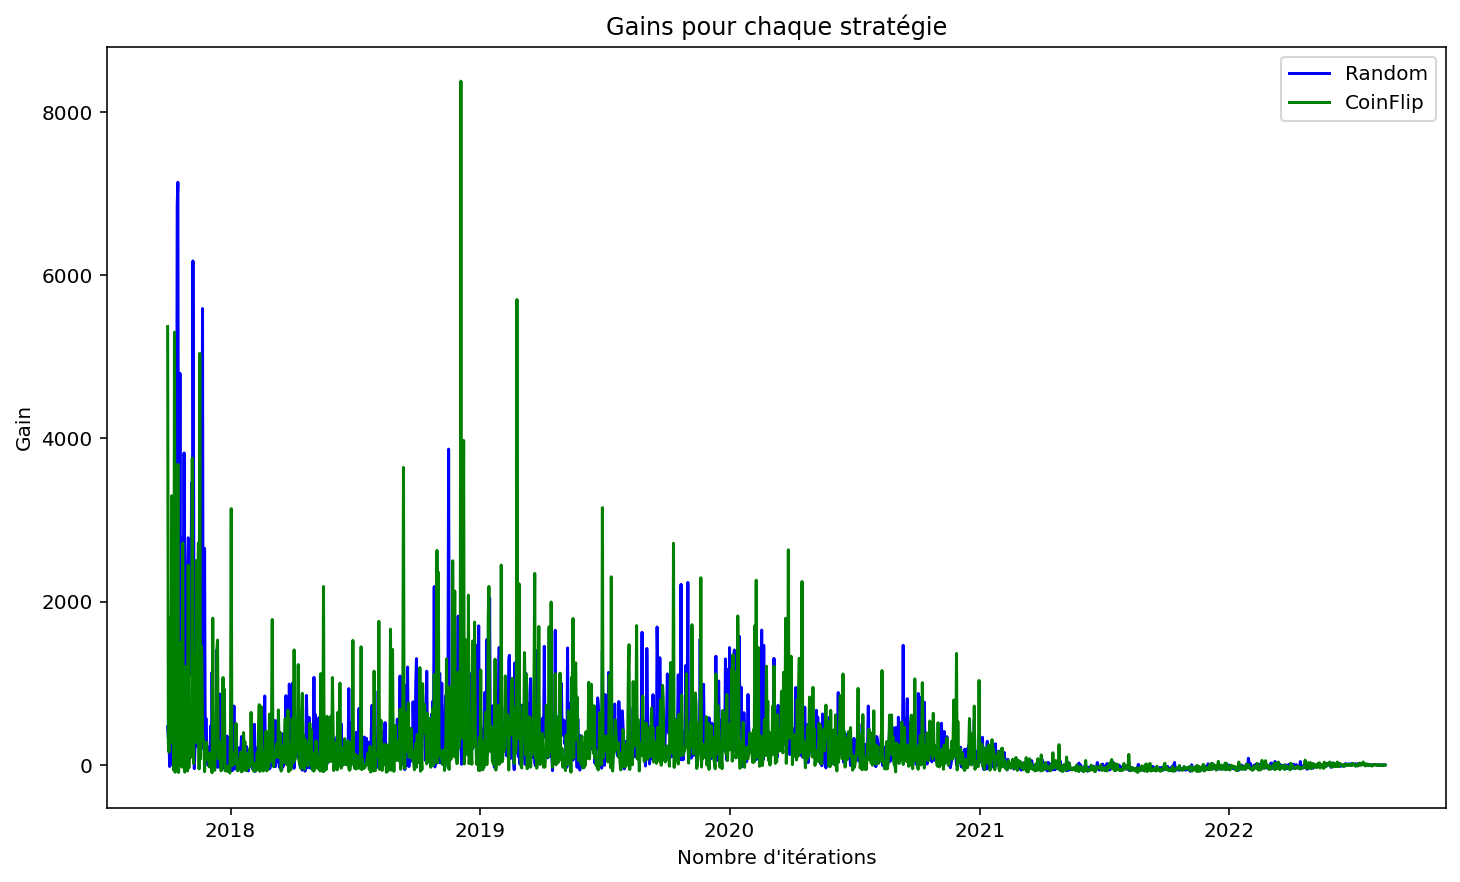

In [13]:
def graphicrandomgains():
    strategies = ['Random', 'CoinFlip' ]
    colors = [ "blue","green"]
    for strategy_name, color in zip(strategies, colors):
        plt.plot(gain[strategy_name], color=color, label=strategy_name)

    plt.title("Gains pour chaque stratégie")
    plt.xlabel("Nombre d'itérations")
    plt.ylabel("Gain")
    plt.legend()
    plt.show()
graphicrandomgains()

In [14]:
def graphiclittlegains():
    strategies = [ 'EffetJanvier','LongTerm', 'InvestmentThreshold', 'DollarSpendOverTime' ]
    colors = [ "blue","green", "orange", "brown"]
    for strategy_name, color in zip(strategies, colors):
        plt.plot(gain[strategy_name], color=color, label=strategy_name)

    plt.title("Gains pour chaque stratégie")
    plt.xlabel("Nombre d'itérations")
    plt.ylabel("Gain")
    plt.legend()
    plt.show()
#graphiclittlegains()

In [15]:
def graphicmiddlegains():
    strategies = ['Kinjun_Sen', 'IntrinsicPrice']
    colors = ["red", "green" ]

    for strategy_name, color in zip(strategies, colors):
        plt.plot(gain[strategy_name], color=color, label=strategy_name)

    plt.title("Gains pour chaque stratégie")
    plt.xlabel("Nombre d'itérations")
    plt.ylabel("Gain")
    plt.legend()

    plt.show()
#graphicmiddlegains()

In [16]:
def graphicbiggains():
    strategies = ['Oracle', 'Kinjun_Sen']
    colors = ["red", "green" ]

    for strategy_name, color in zip(strategies, colors):
        plt.plot(gain[strategy_name], color=color, label=strategy_name)

    plt.title("Gain pour la stratégie Oracle comparé a Kinjun Sen")
    plt.xlabel("Nombre d'itérations")
    plt.ylabel("Gain")
    plt.legend()

    plt.show()
#graphicbiggains()